In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.datasets import cifar10

In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [7]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 225s 1us/step


In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
y_test.shape

(10000, 1)

In [12]:
single_image = X_train[0]

In [13]:
single_image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

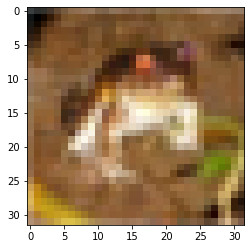

In [14]:
plt.imshow(single_image)

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_example = to_categorical(y_train)

In [19]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
y_example.shape

(50000, 10)

In [21]:
y_example[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [22]:
y_cat_test = to_categorical(y_test,10)

In [23]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

We should normalize the X data

In [24]:
single_image.max()

255

In [25]:
single_image.min()

0

In [26]:
X_train = X_train/255
X_test = X_test/255

In [27]:
scaled_image= X_train[0]

In [28]:
scaled_image.max()

1.0

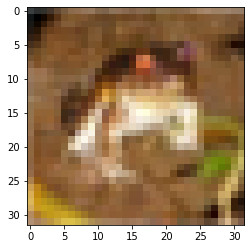

In [29]:
plt.imshow(scaled_image)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [30]:
X_train.shape

(50000, 32, 32, 3)

In [31]:
X_test.shape

(10000, 32, 32, 3)

## Creating Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [68]:
model=Sequential()

#CONVOLUTION LAYERS
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#CONVOLUTION LAYERS
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# FLATTEN IMAGES FROM 32 by 32 by 3 to 3072 BEFORE FINAL LAYER for fully connected layer

model.add(Flatten())

#128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)

model.add(Dense(256,activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

#compliing 

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [70]:
# prevent overfiiting  by using early stopping


In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
early_stop =EarlyStopping(monitor='val_loss',patience=2)

## training model

In [73]:
model.fit(x=X_train,y=y_cat_train,epochs=15,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 36s 22ms/step - loss: 1.5246 - accuracy: 0.4520 - val_loss: 1.2398 - val_accuracy: 0.5536
Epoch 2/15
1563/1563 [==============================] - 37s 23ms/step - loss: 1.1622 - accuracy: 0.5956 - val_loss: 1.2267 - val_accuracy: 0.5807
Epoch 3/15
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9974 - accuracy: 0.6521 - val_loss: 1.1309 - val_accuracy: 0.6137
Epoch 4/15
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8887 - accuracy: 0.6937 - val_loss: 1.0747 - val_accuracy: 0.6345
Epoch 5/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8063 - accuracy: 0.7231 - val_loss: 1.0828 - val_accuracy: 0.6580
Epoch 6/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7388 - accuracy: 0.7472 - val_loss: 0.9991 - val_accuracy: 0.6714
Epoch 7/15
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6881 - accuracy: 0.7649 - val_loss: 1.1084 -

# model evalution

In [74]:
model.metrics_names

['loss', 'accuracy']

In [75]:
lossess= pd.DataFrame(model.history.history)

In [77]:
lossess

,loss,accuracy,val_loss,val_accuracy
0,1.524587,0.45204,1.239794,0.5536
1,1.162192,0.59558,1.226684,0.5807
2,0.997362,0.65206,1.130852,0.6137
3,0.888698,0.69366,1.074742,0.6345
4,0.806290,0.72312,1.082796,0.6580
5,0.738847,0.74716,0.999143,0.6714
6,0.688116,0.76490,1.108394,0.6674
7,0.642492,0.78148,1.132039,0.6764


<AxesSubplot:>

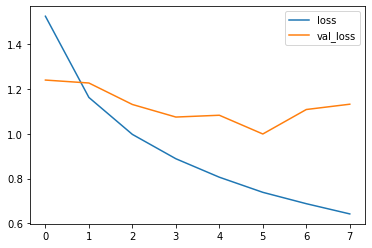

In [78]:
lossess[['loss','val_loss']].plot()

<AxesSubplot:>

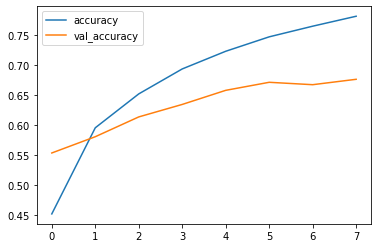

In [79]:
lossess[['accuracy','val_accuracy']].plot()

In [80]:
model.evaluate(x=X_test,y=y_cat_test,verbose=2)

313/313 - 1s - loss: 1.1320 - accuracy: 0.6764 - 1s/epoch - 4ms/step


[1.1320393085479736, 0.6764000058174133]

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
predictions = model.predict(X_test)

In [83]:
classes_x=np.argmax(predictions,axis=1)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
predictions[0]

array([4.3824399e-03, 6.8697007e-04, 1.0733109e-01, 7.1328276e-01,
       1.8004419e-02, 1.2555908e-01, 2.9749848e-02, 1.3036364e-04,
       8.6800498e-04, 5.0986687e-06], dtype=float32)

In [88]:
classes_x[0]

3

In [89]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.60      0.81      0.69      1000
           1       0.82      0.81      0.82      1000
           2       0.49      0.66      0.56      1000
           3       0.53      0.45      0.48      1000
           4       0.70      0.58      0.64      1000
           5       0.55      0.58      0.56      1000
           6       0.80      0.71      0.76      1000
           7       0.79      0.69      0.74      1000
           8       0.79      0.73      0.76      1000
           9       0.83      0.73      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [92]:
confusion_matrix(y_test,classes_x)

array([[811,  15,  64,  17,   7,   7,   4,   6,  39,  30],
       [ 47, 815,  19,  12,   1,   3,  13,   2,  35,  53],
       [ 88,   9, 664,  49,  62,  59,  29,  22,   7,  11],
       [ 47,  15, 146, 447,  49, 177,  54,  28,  20,  17],
       [ 60,   5, 121,  56, 582,  69,  33,  59,  12,   3],
       [ 27,   2, 129, 140,  36, 577,  25,  48,  10,   6],
       [ 15,  13,  88,  57,  39,  45, 713,  13,  13,   4],
       [ 34,   3,  74,  33,  50,  89,   4, 690,   8,  15],
       [158,  22,  30,  19,   5,  10,   5,   3, 732,  16],
       [ 54,  96,  33,  15,   2,   8,   7,   6,  46, 733]], dtype=int64)

In [93]:
import seaborn as sns

<AxesSubplot:>

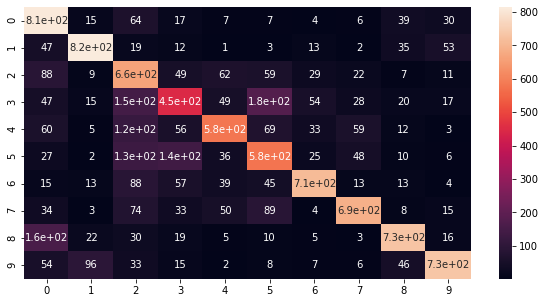

In [94]:

plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,classes_x),annot=True)

# Predicting a given image

In [95]:
my_img = X_test[1]

In [96]:
classes_x

array([3, 8, 8, ..., 5, 0, 7], dtype=int64)

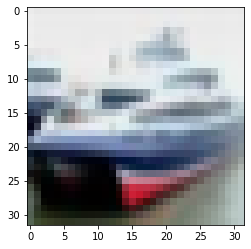

In [98]:
plt.imshow(my_img)

In [100]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_img.reshape(1, 32, 32, 3)),axis=1)

array([8], dtype=int64)